<a href="https://colab.research.google.com/github/seodalzzz/ESAA/blob/Python_Machine_Learning/Python_Machine_Learning_CHAP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__CHAP2. 사이킷런으로 시작하는 머신러닝__

##__1. 사이킷런 소개와 특징__

사이킷런(scikit-learn)
  * 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
  * 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공함

사이킷런의 특징
  * 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공함
  * 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공함
  * 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리


In [1]:
#conda를 이용해 사이킷런 구동에 필요한 넘파이나 사이파이 등의 다양한 라이브러리를 동시에 설치
#conda install scikit-learn

#pip를 이용한 설치
#pip install scikit-learn


SyntaxError: ignored

In [2]:
#사이킷런 버전 확인
import sklearn

print(sklearn.__version__)

1.0.2


##__2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기__

붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)
  * 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측

분류(Classification)는 대표적인 지도학습의 예
  * 지도학습
    * 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 셋에서 미지의 레이블을 예측함.
    * 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
    * 학습 데이터 세트로 학습 / 테스트 데이터 세트로 성능을 평가

  * sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
  * sklearn.tree : 트리기반 ML 알고리즘을 구현한 클래스의 모임
  * sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    * 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터 > 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있음
    

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [41]:
import pandas as pd

#붓꽃 데이터 세트 로딩
iris=load_iris()

#iris.data는 iris 데이터 세트에서 피처만으로 된 데이터를 numpy로 가지고 있음
iris_data=iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label=iris.target
print('rirs target값 : ',iris_label)
print('iris target명 : ',iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

rirs target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


> 피처에는 sepla'length, sepal width, petal length, petal width가 있음

> 레이블은 0,1,2 세 가지 값으로 돼 있으며 0이 Setosa 품종, 1이 versicolor 품종, 2가 virginica 품종을 의미함


  * 학습용 데이터와 테스트용 데이터를 분리
    * 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요함

  * train_test_split() : 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 분할
  

In [42]:
X_train,X_test,y_train,y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

> iris_data : 피처 데이터 세트 / iris_labe : 레이블 데이터 세트

iris_data : 피처 데이터 세트 / iris_labe : 레이블 데이터 세트

> test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율

> random_state : 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
  * teset_train_split()은 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 만들 수 있음

> X_train : 학습용 피처 데이터 세트 / X_test : 테스트용 피처 데이터 세트 / y_train : 학습용 레이블 데이터 세트 / y_test : 테스트용 레이블 데이터 세트

  * 의사결정트리를 이용해 학습과 예측 수행
    * 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 테스트 데이터 세트를 이용함
      * DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [43]:
#DecisionTreeClassifier 객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [44]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred=dt_clf.predict(X_test)

  * 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가
    * 정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
  
  * accuracy_socre() : 정확도 측정 함수
    * 첫번째 파라미터 : 실제 레이블 데이터 세트
    * 두번째 파리미터 : 예측 레이블 데이터 세트

In [45]:
#예측 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인
from sklearn.metrics import accuracy_score

print('예측 정확도 :  {0:4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 :  0.933333


<붓꽃 데이터 세트로 분류를 예측한 프로세스>


  1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
  2. 모델 학습 : 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습
  3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
  4. 평가 : 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가



##__3. 사이킷런의 기반 프레임워크 익히기__


###1) Estimator 이해 및 fit(), predict()메서드
  * fit() : ML 모델 학습
  * predict() : 학습된 모델의 예측
  * 분류와 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과반환
  * Classifier : 분류 알고리즘을 구현한 클래스 / Regresser : 회귀 알고리즘을 구현한 클래스
  * Estimator 클래스 : Classifier 클래스 + Regresser 클래스 =  지도학습의 모든 알고리즘을 구현한 클래스
  * 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용
    * 비지도학습과 피처 추출에서의 fit()은 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업 >
    * fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행함.
    * fit_transform()도 제공


###2) 사이킷런의 주요 모듈
  * 예제 데이터
    * sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
  * 피처 처리
    * sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
    * sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
    * sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨. 예를 들어 텍스트 데이터에서 Count Vectorizer나 Tf-Idf Vectorizer 등을 생성하는 기능 제공 텍스트 데이터의 피처 추출은 sklearn.feature_extraction.text 모듈에, 이미지 데이터의 피처 추출은 sklearn_feature_extraction.image 모듈에 지원 API가 있음
  * 피처 처리 & 차원 축소
    * sklean.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA,NMF,Trncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음
  * 데이터 분리, 검증 & 파라미터 튜닝
    * sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 전체 서치로 최적 파라미터 추출 등의 API 제공
  * 평가
    * sklean.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공
  * ML 알고리즘
    * skleanr.ensemble : 앙상블 알고리즘 제공. 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공
    * sklearn.linear_model : 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. 또한 SGD 관련 알고리즘도 제공
    * sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항분포 NB 등
    * sklearn.neighbors : 최근접 이웃 알고리즘 제공, K-NN 등
    * sklearn.svm : 서포트 벡터 머신 알고리즘 제공
    * sklearn.tree : 의사 결정 트리 알고리즘 제공
    * sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (K-평균, 계층형, DBSCAN 등)
  * 유틸리티
    * sklearn.pipelien : 피처 처리 등의 변환과 ML알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공
    


  * 일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(Feature processing), ML 알고리즘 학습/예측 수행, 모델 평가의 단계를 반복적으로 수행하는 것

###4) 내장된 예제 데이터 세트
  * 분류와 회귀 연습용 예제 데이터
    * datasets.load_boston() : 회귀 용도, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
    * datasets.load_breast_cancer() : 분류 용도, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
    * datasets.load_diabetes() : 회귀 용도, 당뇨 데이터 세트
    * datasets.load_digits() : 분류 용도, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
    * datasets.load_iris() : 분류 용도, 붓꽃에 대한 피처를 가진 데이터 세트
  * fetch계열의 데이터 : 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 라는 서브 디렉터리에 저정한 후 추후 불러들이는 데이터
    * fetch_covtype() : 회귀 분석용 토지 조사 자료
    * fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
    * fetch_lfw_people() : 얼굴 이미지 자료
    * fetch_olivetti_faces() : 얼굴 이미지 자료
    * fetch_lfw_pairs() : 얼굴 이미지 자료
    * fetch_rcv1() : 로이터 뉴스 말뭉치
    * fetch_mldata() : ML 웹사이트에서 다운로드

  * 분류와 클러스터링을 위한 표본 데이터 생성기
    * datasets.make_classifiactions() : 분류를 위한 데이터 세트를 만듦. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 줌
    * datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해 줌. 군집 비정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트르 쉽게 만들어 줌

  * 분류나 회귀를 위한 연습용 예제 데이터 세트는 딕셔너리 형태로 되어 있음
    * data : 피처의 데이터 세트
    * target : 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트
    * target_names : 개별 레이블의 이름
    * feature_names : 피처의 이름
    * DESCR : 데이터 세트에 대한 설명과 각 피처의 설명
    * data, target은 ndarray, target_names, feature_names는 ndarray 또는 list, DESCR 은 string

  

  * 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key 값을 지정하면 됨

In [46]:
# 붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data=load_iris()
print(type(iris_data))


<class 'sklearn.utils.Bunch'>


> load_iris() API의 반환 결과는 sklearn.utils.Bunch 클래스
  * Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

In [47]:
#load_iris() 데이터 세트의 key값을 확인
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ',keys)

붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


> data : 피처들의 데이터 값
  * 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서는 데이터 세트.data 또는 데이터세트['data']를 이용하면 됨

In [48]:
print('\n feature_names의 type : ',type(iris_data.feature_names))
print(' feature_names의 shape : ', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type : ',type(iris_data.target_names))
print(' target_names의 shape : ', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type : ',type(iris_data.data))
print(' data의 shape : ', len(iris_data.data))
print(iris_data.data)

print('\n target의 type : ',type(iris_data.target))
print(' target의 shape : ', len(iris_data.target))
print(iris_data.target)



 feature_names의 type :  <class 'list'>
 feature_names의 shape :  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type :  <class 'numpy.ndarray'>
 target_names의 shape :  3
['setosa' 'versicolor' 'virginica']

 data의 type :  <class 'numpy.ndarray'>
 data의 shape :  150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

##4. Model Selection 모듈 소개

  * 사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

###1) 학습/테스트 데이터 세트 분리 - train_test_split()

  * 먼저 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습한 경우 생기는 문제점

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data,train_label)

#학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


> 예측 정확도가 100%


  * train_test_split() : 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 분리
    * 첫번째 파라미터 : 피처 데이터 세트, 두번째 파라미터 : 레이블 데이터 세트
    * test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 정함 / default : 0.25
    * train_size : 전체 데이터에서 학습용 데이터 세트를 크기를 얼마로 샘플링 할 것인가를 결정 / 잘 사용되지 않음
    * shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정 / default : True / 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
    * random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
    * train_test_split()의 반환 값은 튜플 형태. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환됨



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier()
iris_Data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target, test_size=0.3,random_state=121)

In [51]:
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도 : 0.9556


> 붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도 밖에 되지 않으므로 이를 통해 알고리즘의 예측 성능을 판단하기에는 적절하지 않음

###2) 교차 검증

* 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것

* 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하됨 >> 교차검증

* 교차검증
  * 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
  * 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 쉽게 할 수 있음

* 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터세트에 적용해 평가하는 프로세스

* ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있음. 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

####(1) K 폴드 교차 검증

* 가장 보편적으로 사용되는 교차 검증 기법
* K 개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행

* K=5
  * 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5변 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가

    (1) 데이터 세트를 5등분

    (2) 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정

    (3) 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가 수행

    (4) 두번째 반복에서는 4번째 등분을 검증 데이터 세트로 사용

    (5) 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째까지 학습과 검증을 수행

    (6) 5개의 예측 평가를 구했으면 이를 평균해서 K폴드 평가 결과로 반영

* 사이킷런에서는 K폴드 교차 검증 프로세스를 구현하기 위해 KFold, StratifiedKFold 클래스를 제공함



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트 별 정확도를 담을 리스트 객체 생성
kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기 : ', features.shape[0])

붓꽃 데이터 세트 크기 :  150


* KFold 객체의 split() : 데이터 세트 분리
  * 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환
  * 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야 함

In [53]:
n_iter=0

#KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train,X_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  n_iter+=1
  #반복시마다 정확도 측정
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
  print('\{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 : ', np.mean(cv_accuracy))

\1 교차 검증 정확도 : 1.0, 학습 데이터 크기: 120, 검증 데이터 크기:30
\1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
\2 교차 검증 정확도 : 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기:30
\2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
\3 교차 검증 정확도 : 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기:30
\3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
\4 교차 검증 정확도 : 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기:30
\4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
\5 교차 검증 정확도 : 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기:30
\5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 :  0.9


####(2) Stratified K 폴드

* 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식
  * 불균형한 분포도를 가진 레이블 데이터 집합 : 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것

* ex. 대출사기 데이터 예측
  * 대출사기 : 1, 정상대출 : 0
  * 데이터 1억건 중 1000건의 대출사기
  * 작은 비율로 1 레이블 값이 있다면 K폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생함. 즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 상대적으로 많이 들어 있고, 다른 반복 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생
  * 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 것이 매우 중요

* Stratified K폴드는 이처럼 K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 줌.

* 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [54]:
# K폴드의 문제점 확인
import pandas as pd
iris= load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

> 레이블 값은 0,1,2 모두 50개로 동일

In [55]:
# 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인
kfold=KFold(n_splits=3)
n_iter=0
for train_index,test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n',label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts(),iris_df['label'].value_counts)


## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64>
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64>
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64>


> 첫번째 교차검증에서 학습레이블에는 1,2밖에 없고 검증레이블에는 0밖에 없음. > 학습레이블에 0이 없기 때문에 0의 경우는 전혀 학습하지 못하고, 검증레이블에는 0밖에 없기 때문에 학습 모델은 절대 0을 예측하지 못함.


* StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split()메서드에 인자로 피처 데이터 세트 뿐 아니라 레이블 데이터 세트도 반드시 필요함.

In [56]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


> 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨

In [57]:
df_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features,label):
  #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train,X_test=features[train_index], features[test_index]
  y_train,y_test=label[train_index],label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)

  #반복 시마다 정확도 측정
  n_iter+=1
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

#교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
print("## 평균 검증 정확도: ",np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9666666666666667


* 일반적으로 분류에서의 교차 검증은 K폴드가 아니라 Stratified K 폴드로 분할되어야 함

####(3) 교차 검증을 보다 간편하게 - cross_val_score()

* KFold로 데이터 학습 및 예측 과정
  * 폴드 세트를 설정
  * for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
  * 바복적으로 학습과 예측을 수행하고 예측 성능을 반환

* cross_val_score()는 이러한 일련의 과정을 한꺼번에 수행

* corss_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
  * estimator : Classifier / Regresser
  * X : 피처 데이터 세트
  * y : 레이블 데이터 세트
  * scoring : 예측 성능 평가 지표
  * cv : 교차 검증 폴드 수

* cross_val_score는 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환

* cross_val_score()에 classifier가 입력되면 Stratified K폴드 방식으로 레이블 값의 분포에 따라 학습/테스트 세트를 분할 / Regresser의 경우에는 K폴드 방식으로 분할



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores=cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ',np.round(scores,4))
print('평균 검증 정확도 : ',np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


* corss_validate()
  * 여러 개의 평가 지표 반환
  * 학습 데이터에 대한 성능 평가 지표와 수행 시간도 함께 제공

###3) GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에 

* 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있음

* 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

* 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있음
  * for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API레벨에서 제공한 것


In [59]:
grid_parameters={'max_depth': [1,2,3], 'min_samples_split':[2,3]}

* GridSearch는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌. > 데이터 세트를 corss-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있음

* GridSearch는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념해야 함

* GridSearchCV 클래스의 생성자 파라미터
  * estimator : classifier, regressor, pipline
  * param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐. esitmator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
  * scoring : 예측 성능을 측정할 평가 방법을 지정. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예 : 정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정 가능
  * cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
  * refit : True > 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 (default=True)

In [60]:
# 결정 트리 알고리즘의 여러가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는데 GridSearchCV를 이용
# 파라미터 : max_depth, min_samples_split

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree=DecisionTreeClassifier()

##파라미터를 딕셔너리 형태로 설정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [61]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold 로 나누어 테스트 수행 설정
### refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습시킴

grid_dtree=GridSearchCV(dtree,param_grid=parameters,cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파리미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


* params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값
* rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위. 1이 가장 뛰어난 순위, 이때의 파라미터가 최적의 하이퍼 파라미터
* mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값




* GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨.

In [62]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))


GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [63]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator=grid_dtree.best_estimator_

#GridSearchCV의 best_estimator는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.966667


* 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법임.

##__5. 데이터 전처리__

* ML알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있음.

* 사이킷런의 ML 알고리즘 적용 전에 데이터에 대해 처리해야 할 기본사항
  * 결손값 NaN, Null 값은 허용되지 않음 > 고정된 다른 값으로 변환해야 함
    * 어떤 피처가 Null 값이 대부분이라면 해당 피처는 드롭
    * 상황에 따라 다르게 대처
  * 문자열 값을 입력값으로 허용하지 않음
    * 모든 문자열 숫자 형으로 변환되어야 함
    * 문자열 값 : 카테고리형 피처, 텍스트형 피처
    * 카테고리형 피처는 코드 값으로 표현
    * 텍스트형 피처는 벡터화하거나 불필요한 피처라고 판단되면 삭제 (ex. 이름이나 주민번호와 같은 식별자 피처)

    

###1) 데이터 인코딩


####(1) 레이블 인코딩
  * 카테고리 피처를 코드형 숫자 값으로 변환하는 것
  * LabelEncoder 클래스로 구현
  * LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행


In [64]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)



인코딩 변환값: [0 1 4 5 3 3 2 2]


In [65]:
# 어떤 문자열 값이 어떤 숫자값으로 인코딩 됐는지 확인
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


> 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음

* inverse_transform() : 인코딩 된 값을 다시 디코딩


In [66]:
print('디코딩 원본값 : ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환

* 숫자 값의 경우 크고 작음에 대한 특성이 작용함 > 레이블 인코딩이 일괄적인 숫자 값으로 변환되면서 몇몇 ML알고리즘에는 레이블 인코딩을 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음

* 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
  * 트리 계열의 ML 알고리즘은 숫자의 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없음
  

####(2) 원-핫 인코딩(One-Hot Encoding)

* 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시
* 행 형태로 돼 있는 피처의 고유 갑을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

* OneHotEncoder 클래스
  * OneHotEncoder로 변환하기 전에 모든 문자여 값이 숫자형 값으로 변환되어야 함
  * 입력 값으로 2차원 데이터가 필요함

In [67]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

#2차원 데이터로 변환
labels=labels.reshape(-1,1)

#원-핫 인코딩을 적용합니다.
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


* pandas의 get_dummies() : 원-핫 인코딩을 지원하는 API
  * 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환 가능

In [68]:
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


###2) 피처 스케일링과 정규화
  * 피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
    * 표준화(Standardization), 정규화(Normalization)

  * 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
  xi_new=(xi-mena(x)/stdev(x))

  * 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
    * 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소0~최대1의 값으로 변환하는 것
    * 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것
    * 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환
    * xi_new=(xi-min(x))/(max(x)-min(x))

* 사이킷런의 전처리에서 제공하는 Normalization과 일반적인 정규화의 차이
  * 사이킷런의 Normalization 모듈 : 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환
    * 개별 벡터를 모든 피처 벡터의 크기로 나누어 줌

###3) StandardScaler
* 표준화를 지원하기 위한 클래스
* 개별 피처를 평균이 0이고 분산이 1인 값으로 변환
* SVM, 선형 회귀, 로지스틱 회귀의 경우 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있음


In [69]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris=load_iris()
iris_Data=iris.data
iris_df=pd.DataFrame(data=iris_Data, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [70]:
#StandardScaler를 이용해 각 피처를 한번에 표준화해 변환

from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\n feature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

 feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


###4) MinMaxScaler
* 데이터값을 0과 1 사이의 범위 값으로 변환함
* 음수값이 있으면 -1과 1 사이의 값으로 변환
* 데이터의 분포가 가우시안 분포가 아닌 경우에 Min, Max Scale을 적용 가능

In [71]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()

#MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('featrue 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

featrue 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


###5) 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

* StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform()메소드를 이용함
  * fit() : 데이터 변환을 위한 기준 정보 설정 (ex. 최댓값/최솟값 설정)
  * transform() : 설정된 정보를 이용해 데이터를 반환
  * fit_transform() : fit()과 transform()을 한번에 적용

* Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform()변환을 적용해야 함. 즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함.
  * 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라져 올바른 예측 결과를 도출하지 못할 수 있음.

In [72]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습데이터는 0부터 10 까지, 테스트 데이터느 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), trnasform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [73]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0-1 값으로 변환
scaler=MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled=scaler.transform(train_array)

print('원본 train_array 데이터 : ',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 : ',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [74]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환. 원본 5->1로 변환
test_scaled=scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scaled된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scaled된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


> 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음. >> 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과 초래

* 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1로 변환되어야 함.

* 위와 같은 이유로 테스트데이터에 다시 fit()을 적용하면 안되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함.

In [75]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_Scaled=scaler.transform(train_array)
print('원본 train_array 데이터: ', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터: ', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled=scaler.transform(test_array)
print('\n원본 test_array 데이터 : ',np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터 : ',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


* fit_transform()을 할 때도 마찬가지 > 테스트 데이터에서는 절대 사용하면 안됨

* 학습과 테스트 데이터에 fit()과 transform()을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직함.

* 스케일링 변환시 유의사항 정리
  * 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
  * 여의치 않다면 테스트 데이터 변환시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 scaler 객체를 이용해 transform()으로 변환
  

##__6. 사이킷런으로 수행하는 타이타닉 생존자 예측__

* 타이타닉 데이터
  * Passengerid : 탑승자 데이터 일련번호
  * survived : 생존 여부, 0=사망, 1=생존
  * pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
  * sex : 탑승자 성별
  * name : 탑승자 이름
  * Age : 탑승자 나이
  * sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
  * parch : 같이 탑승한 부모님 또는 어린이 인원수
  * ticket : 티켓번호
  * fare : 요금
  * cabin : 선실번호
  * embarked : 중간 정착 항구 /C=Cherbourg,Q=Queenstown,S=Southampton

  

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [107]:
print('\n ### 학습 데이터 정보 ###\n')
print(titanic_df.info())


 ### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* Null 값 처리 필요
  * fillna()함수를 이용해 Null 값을 평균 또는 고정 값으로 변경

In [108]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [109]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())


Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


> Cabin의 경우 속성 값이 제대로 정리되어 있지 않음

> 선실 번호 중 선실 등급을 나타내는 가장 앞 알파벳만 추출(부자와 가난한 사람 구분)


In [110]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [111]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

> 여자는 74.2%가 생존했지만, 남자는 18.8%가 생존함.

* Survived 칼럼은 레이블로서 결정 클래스 값


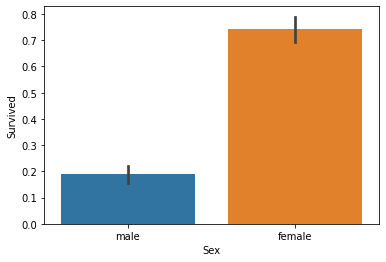

In [83]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

* 객실 등급 변수를 이용하여 부자와 가난한 사람 간의 생존 확률 비교


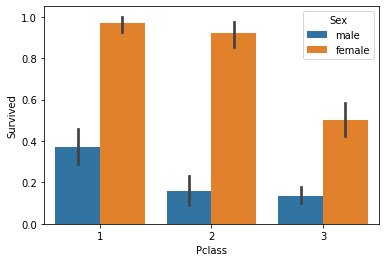

In [84]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

> 여성의 경우 선실 등급에 따른 생존 확률의 차이는 크지 않음 BUT 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐

> 남성의 경우 일등실의 생존 확률이 이,삼등실의 생존확률보다 월등히 높음.

  * Age에 따른 생존확률
    * Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리값을 할당
    * 0~5세 : Baby
    * 6~12세 : Child
    * 13~18세 : Teenager
    * 19~25세 : Student
    * 26~35세 : Young Adult
    * 36~60세 : Adult
    * 61세 이상 : Elderly
    * -1이하의 오류값 : Unknown
    

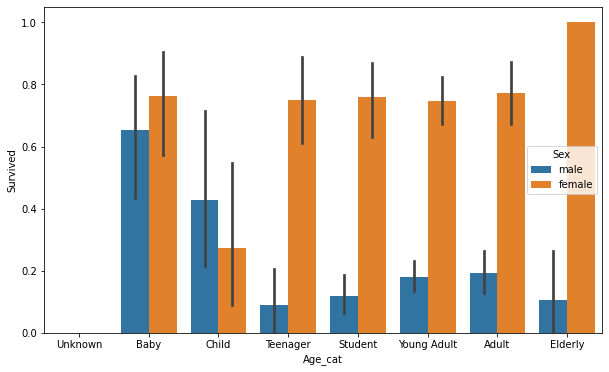

In [90]:
#입력 Age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat=''
  if age<= -1 : cat='Unknown'
  elif age<=5 : cat='Baby'
  elif age<=12:cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25:cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60 : cat='Adult'
  else: cat='Elderly'

  return cat

#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult', 'Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age'값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

  > 여자 Baby의 경우 비교적 생존 확률이 높음.

  > 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음
  
  > 여자 Elderly의 경우 생존 확률이 매우 높음


  * 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
    * LabelEncoder() : 카테고리 값의 유형 수에 따라 0~(카테고리 유형 수 -1) 까지의 숫자 값으로 변환

In [92]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


  * 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들기
  * transform_features()

In [113]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

  * 데이터 전처리를 수행하는 transform_features() 함수를 이용해 다시 원본 데이터 가공

In [114]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)


In [116]:
#내려받은 학습 데이터 세트를 기반으로 별도의 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X_titanic_df,y_titanic_df, test_size=0.2, random_state=11)

  * ML알고리즘을 이용해 타이타닉 생존자를 예측
  * 사이킷런 클래스를 이용해 train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모덱을 학습(fit)하고 예측(predict)
  * 예측 성능은 정확도로 평가 accuracy_score() 사용

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClasifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomFroestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogistcRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClasifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


> 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타냄

> 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없음

  * 교차 검증으로 결정 트리 모델을 평가
  * model_selection패키지의 KFold클래스, cross_val_score(), GridSearchCV 클래스 사용

In [119]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수 만큼 예측 결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)

  scores=[]

  #KFold 교차검증 수행
  for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    #Classifier 학습,예측,정확도 계산
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))

  #5개 fold 에서의 평균 정확도 계산
  mean_score=np.mean(scores)
  print('평균 정확도: {0:4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf,folds=5)



교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.786517
교차 검증 3 정확도: 0.769663
교차 검증 4 정확도: 0.820225
평균 정확도: 0.782299


  * cross_val_score() API를 이용해 교차검증 수행

In [122]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.775281
교차 검증 2 정확도: 0.792135
교차 검증 3 정확도: 0.786517
교차 검증 4 정확도: 0.842697
평균 정확도: 0.7879


> cross_val_score()와 KFold의 정확도가 다른 이유 : cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

  * GridSearchCV를 이용해 DicisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정

In [126]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


> 최적화된 하이퍼 파라미터로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 향상됨

##__7. 정리__

* 사이킷런은 매우 많은 머신러닝 알고리즘을 제공할 뿐만 아니라, 쉽고 직관적인 API프레임워크, 편리하고 다양한 모듈 지원 등으로 파이썬 계열의 대표적인 머신러닝 패키지로 자리잡았음.

* 머신러닝 애플리케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킴. 그리고 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행하고, 이렇게 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성됨.

* 데이터의 전처리 : 오류데이터의 보정, 결손값 처리등의 데이터 클렌징 작업, 레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업, 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것

* 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 함. 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높음.
